In [10]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

In [11]:
# import dataset
dataset=pd.read_csv('delivery_time.csv')
dataset

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


****EDA and Data Visualization****


In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


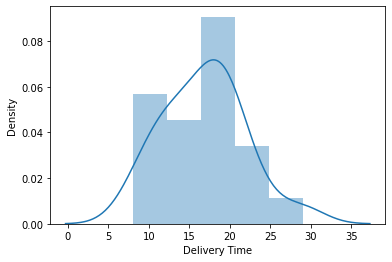

In [19]:
sns.distplot(dataset['Delivery Time'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


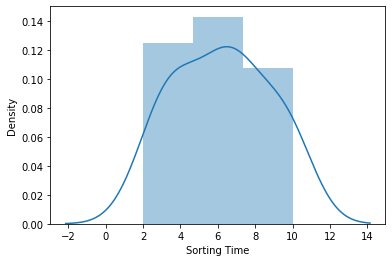

In [20]:
sns.distplot(dataset['Sorting Time'])

In [21]:
# Renaming Columns
dataset=dataset.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
dataset

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# Transformations

*Square Transformation*

In [32]:
arr1 =np.array(dataset['delivery_time'])
sq_value = np.square(arr1)                              
print(sq_value)

[441.     182.25   390.0625 576.     841.     235.6225 361.      90.25
 320.41   351.5625 393.2289 115.5625 278.2224 132.25   144.7209 221.4144
 189.0625 327.9721  64.     317.9089 462.25  ]


In [33]:
arr2 =np.array(dataset['sorting_time'])
sq_value = np.square(arr2)                              
print(sq_value)

[100  16  36  81 100  36  49   9 100  81  64  16  49   9   9  16  36  49
   4  49  25]


*Log Transformation*

In [23]:
a = np.array(dataset['delivery_time'])
log_value =np.log(a)
print(log_value)

[3.04452244 2.60268969 2.98315349 3.17805383 3.36729583 2.73111547
 2.94443898 2.2512918  2.88480071 2.93119375 2.98719594 2.37490575
 2.8142104  2.44234704 2.48740353 2.70001803 2.62103882 2.89646427
 2.07944154 2.88088243 3.06805294]


In [24]:
b = np.array(dataset['sorting_time'])
log_value =np.log(b)
print(log_value)

[2.30258509 1.38629436 1.79175947 2.19722458 2.30258509 1.79175947
 1.94591015 1.09861229 2.30258509 2.19722458 2.07944154 1.38629436
 1.94591015 1.09861229 1.09861229 1.38629436 1.79175947 1.94591015
 0.69314718 1.94591015 1.60943791]


*Square root Transformation*

In [25]:
A = np.array(dataset['delivery_time'])
print(A)

[21.   13.5  19.75 24.   29.   15.35 19.    9.5  17.9  18.75 19.83 10.75
 16.68 11.5  12.03 14.88 13.75 18.11  8.   17.83 21.5 ]


In [28]:
sqrt = np.sqrt(A)
print(sqrt)

[4.58257569 3.67423461 4.44409721 4.89897949 5.38516481 3.9179076
 4.35889894 3.082207   4.23083916 4.33012702 4.45308882 3.27871926
 4.08411557 3.39116499 3.46842904 3.8574603  3.70809924 4.25558457
 2.82842712 4.22255847 4.63680925]


In [27]:
B = np.array(dataset['sorting_time'])
print(B)

[10  4  6  9 10  6  7  3 10  9  8  4  7  3  3  4  6  7  2  7  5]


In [29]:
sqrt = np.sqrt(B)
print(sqrt)             

[3.16227766 2.         2.44948974 3.         3.16227766 2.44948974
 2.64575131 1.73205081 3.16227766 3.         2.82842712 2.
 2.64575131 1.73205081 1.73205081 2.         2.44948974 2.64575131
 1.41421356 2.64575131 2.23606798]


****Correlation Analysis****


In [34]:
dataset.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


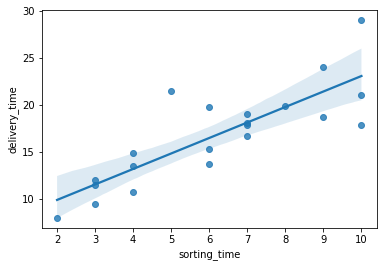

In [35]:
sns.regplot(x=dataset['sorting_time'],y=dataset['delivery_time'])

****Mdel Building****

In [36]:
model=smf.ols("delivery_time~sorting_time",data=dataset).fit()

****Model Testing****

In [37]:
# Finding Coefficient parameters
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [38]:
# Finding tvalues and pvalues
model.tvalues , model.pvalues

(Intercept       3.823349
 sorting_time    6.387447
 dtype: float64, Intercept       0.001147
 sorting_time    0.000004
 dtype: float64)

In [39]:
# Finding Rsquared Values
model.rsquared , model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

****Model Predictions****

In [40]:
# Manual prediction for say sorting time 5
delivery_time = (6.582734) + (1.649020)*(5)
delivery_time

14.827834

In [41]:
# Automatic Prediction for say sorting time 5, 8
new_data=pd.Series([5,8])
new_data

0    5
1    8
dtype: int64

In [42]:
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,5
1,8


In [43]:
model.predict(data_pred)

0    14.827833
1    19.774893
dtype: float64